## This notebook is used just to perform the cross-validation

In [0]:
# This code has been written by Stefano Brilli, s249914@studenti.polito.it
# Last update on Oct 11th
# Please note that this code can be used just for running the training phase.
# In the future here will be possible testing the model

%tensorflow_version 1.x
import tensorflow as tf
import datetime, os
from sklearn.metrics import confusion_matrix, classification_report
import string
import utils as utl
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
%matplotlib inline

plt.style.use('dark_background')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def print_train_infos(history, title):
    """
    This method plots informations on losses for train and validation set during the training
    :param history:
    :return:
    """
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.title(title)
    plt.show()

In [0]:
# Paths
base_dir="./drive/My Drive/Colab Notebooks/Bioinformatics/Project/"
sub_dir = datetime.datetime.strftime(datetime.datetime.now(), '%Y%m%d-%H%M%S')
results_dir = base_dir + 'results_cv/' + sub_dir
training_set_path = base_dir + 'datasets/bio_translated_training.csv'
parameters_path  = base_dir + 'datasets/parameters.json'

# Load parameters from JSON file to Python dictionary
params=utl.load_parameters(parameters_path)

In [0]:
# Training set: first four proteins bins
proteins, labels, vocab_to_int, int_to_vocab = utl.read_data(training_set_path)

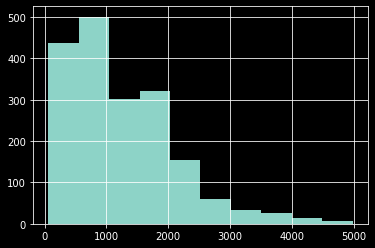

count    1856.000000
mean     1245.498384
std       849.439007
min        60.000000
25%       564.750000
50%      1032.000000
75%      1686.250000
max      4981.000000
dtype: float64

In [6]:
# Training set's features distribution
train_len = [len(x) for x in proteins]
pd.Series(train_len).hist()
plt.show()
pd.Series(train_len).describe()

As we can see, both the training and the testing sets have a mean size on samples of 1200/1300. So it could be a good idea to pad sequences shorter than 1275 and truncate sequences longer than 1275.

In [0]:
proteins = utl.pad_features(proteins, 1000)

In [8]:
# Some statistics
print("Vocabulary size: {}".format(len(vocab_to_int)))
print(vocab_to_int)

Vocabulary size: 22
{'L': 1, 'S': 2, 'P': 3, 'G': 4, 'R': 5, 'A': 6, 'T': 7, 'Q': 8, 'V': 9, 'E': 10, 'K': 11, 'I': 12, 'F': 13, 'D': 14, 'N': 15, 'C': 16, 'H': 17, '*': 18, 'Y': 19, 'W': 20, 'M': 21, 'X': 22}


In [9]:
# Training
proteins_lens = Counter([len(x) for x in proteins])
print("Zero-length proteins: {}".format(proteins_lens[0]))
print("Maximum protein length: {}".format(max(proteins_lens)))
print("Average protein length: {}".format(np.mean([len(x) for x in proteins])))

Zero-length proteins: 0
Maximum protein length: 1000
Average protein length: 1000.0


## Create training, validation and testing sets
In order to train a network we need to split the entire dataset into subsets, and some of them are used as never seen data. We must not use the whole dataset both for training and for testing, because we could overfit the network. We have to simulate to be in a real context, i.e. using the model to predict new available data in such a moment. To fit this rule we split data in two different datasets:
* Training dataset: used to train the network, it represents already available data
* Testing dataset: used when the model has been trained, it tests how much well the network works

For this analysis, we have decided to use a fraction of splitting equals to 0.80, i.e. the training set will be equals to 80% of the original one, while testing set will contain the remaining 20% of data.

In [10]:
x_train, y_train = proteins, labels

print("Data Set Size")
print("Train set: \t\t{}".format(x_train.shape))

Data Set Size
Train set: 		(1856, 1000)


## Model's architecture

In [0]:
  architecture=params['architecture']
  seed=params['seed']
  batch_size=params['batch_size']
  n_splits=params['n_splits']
  n_epochs=params['n_epochs']

  callbacks=[eval(cb['callback_name']) for cb in params['callbacks']]  

## Cross-validation

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Performing cross_validation...


*** CROSS VALIDATION PHASE ***

Train on 1236 samples, validate on 620 samples
Epoch 1/10
1236/1236 [==============================] - 20s 16ms/sample - loss: 0.8695 - acc: 0.5340 - val_loss: 0.8590 - val_acc: 0.6129
Epoch 2/10
1236/1236 [==============================] - 16s 13ms/sample - loss: 0.8490 - acc: 0.5688 - val_loss: 0.8385 - val_acc: 0.5935
Epoch 3/10
1236/1236 [==============================] - 16s 13ms/sample - loss: 0.8576 - acc: 0.5874 - val_loss: 0.7905 - val_acc: 0.6048
Epoch 4/10
1236/1236 [==============================] - 16s 13ms/sample - loss: 0.7775 - acc: 0.6505 - val_loss: 0.7246 - val_acc: 0.7048
Epoch 5/10
1236/1236 [=====================

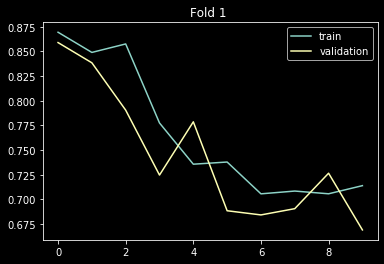



Train on 1238 samples, validate on 618 samples
Epoch 1/10
1238/1238 [==============================] - 17s 13ms/sample - loss: 0.8700 - acc: 0.5355 - val_loss: 0.8597 - val_acc: 0.5906
Epoch 2/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.8498 - acc: 0.6002 - val_loss: 0.8399 - val_acc: 0.6133
Epoch 3/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.8368 - acc: 0.6002 - val_loss: 0.8151 - val_acc: 0.5744
Epoch 4/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.8030 - acc: 0.6333 - val_loss: 0.7809 - val_acc: 0.6084
Epoch 5/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.7562 - acc: 0.6511 - val_loss: 0.7399 - val_acc: 0.6764
Epoch 6/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.7365 - acc: 0.6680 - val_loss: 0.6881 - val_acc: 0.7330
Epoch 7/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.7006 - acc: 0.6963 - val_loss: 0.6828 - v

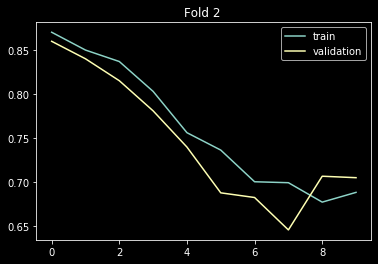



Train on 1238 samples, validate on 618 samples
Epoch 1/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.8707 - acc: 0.5008 - val_loss: 0.8600 - val_acc: 0.5939
Epoch 2/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.8503 - acc: 0.6058 - val_loss: 0.8392 - val_acc: 0.6570
Epoch 3/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.8246 - acc: 0.6042 - val_loss: 0.8394 - val_acc: 0.5210
Epoch 4/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.7813 - acc: 0.6422 - val_loss: 0.7565 - val_acc: 0.6650
Epoch 5/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.7122 - acc: 0.7141 - val_loss: 0.7285 - val_acc: 0.6748
Epoch 6/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.6917 - acc: 0.7294 - val_loss: 0.7212 - val_acc: 0.7201
Epoch 7/10
1238/1238 [==============================] - 16s 13ms/sample - loss: 0.6879 - acc: 0.7197 - val_loss: 0.6911 - v

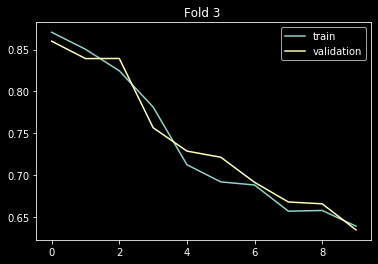





Mean accuracy: 69.88% (+/- 3.76%)


------------------------------------------


In [12]:
# Create a new directory for saving logs and the final model
os.mkdir(results_dir)

# Print params to a file
# utl.print_params_to_json(params, results_dir+'/params.json')

with open(results_dir + '/log_' + sub_dir + '.txt',"w+") as log_file:
  model = utl.initialize_model(architecture)
  
  # Print model's architecture on file
  model.summary(print_fn=lambda x: log_file.write(x + '\n'))

  # Train the new model with CV
  print('Performing cross_validation...\n')
  utl.train_cv(x_train,
               y_train,
               architecture,
               log_file,
               n_splits,
               seed,
               n_epochs,
               batch_size,
               callbacks)